# Método de integração de Simpson

O método de integração de simpson é um método numérico de integração que busca resolver a integral definida de uma função $f(x)$ em um intervalo específico $[a,b]$, 
$$ \int_a^b f(x) dx, $$
numericamente. Como todo método numérico, buscamos eficiência computacional, ou seja, queremos obter o resultado mais próximo do exato possível com o menor número de operações. Nesse caso vamos calcular a integral entre dois pontos calculando o valor da função em apenas 3 pontos.

Vamos usar uma função de exemplo. Queremos realizar a integral da função 
$$ f(x) = e^{-x^2}$$
no intervalo $I = [0,3]$.

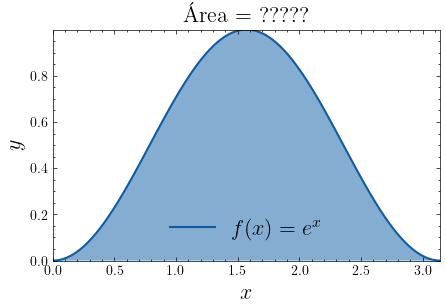

In [2]:
import sympy as sp 
import matplotlib.pyplot as plt 
import scienceplots
from scipy.interpolate import interp1d
import numpy as np
plt.style.use('science')

a = 0.0
b = np.pi

# Definindo uma função de exemplo 
def fun_ex(x):
    return np.sin(x)**2
    # return np.exp(-x**2)

# Definindo a quantidade de pontos no intervalo desejado
x = np.linspace(a,b,100)
y = fun_ex(x) 

# Definindo o tamanho da figura
plt.figure(figsize=(5,3))
# plotando o gráfico
plt.plot(x,y,label="$f(x) = e^{x}$",lw=1.5)
plt.ylim(min(y),max(y))
plt.xlim(a,b)

plt.fill_between(x,y,alpha=0.5)

plt.title("Área = ?????",fontsize=16)

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$y$",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [3]:
len(y)

100

A ideia fundamental do método de simpson é bem simples: 

1) Encontrar o polinômio de 2º grau que passa pelos pontos $(a,f(a)),(\frac{a+b}{2},f(\frac{a+b}{2}))\text{  e  } (b,f(b))$.
2) Usar a expressão analítica da integral de um polinômio de segundo grau no intervalo $[a,b]$.

Portanto pra que a gente entenda como construir essa aproximação de integral a gente só precisa resolver um sistema e integrar. 


In [4]:
def simp_poly(x_,a=0.0,b=3.0):
    f=fun_ex
    x = [a,(a+b)/2.0,b] # python
    y = [f(a),f((a+b)/2.0),f(b)] # f(x) 
    f_interp = interp1d(x,y,kind='quadratic')
    return f_interp(x_)

def lerp(x,f=fun_ex,a=0.0,b=3.0):
    a1 = (f(b)-f(a))/(b-a)
    a0 = f(a) - a1*a
    return a0 + a1*x # interp1d([a,b],[f(a),f(b)],kind='linear')(x)

In [5]:
simp_poly(1)

array(0.88222835)

In [6]:
simp_poly(3.0)

array(0.01991486)

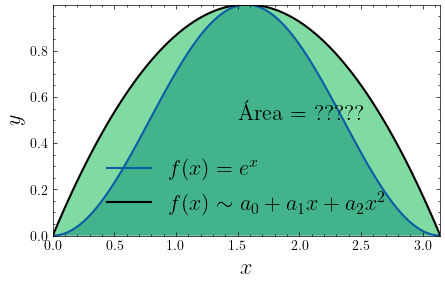

In [7]:
x = np.linspace(a,b,100)
y = fun_ex(x) 

# Definindo o tamanho da figura
plt.figure(figsize=(5,3))
# plotando o gráfico
plt.plot(x,y,label="$f(x) = e^{x}$",lw=1.5)
plt.plot(x,simp_poly(x,a,b),label="$f(x) \sim a_0 + a_1 x + a_2 x^2$",lw=1.5,color='black')
plt.ylim(min(y),max(y))
plt.xlim(a,b)

plt.fill_between(x,y,alpha=0.5)
plt.fill_between(x,simp_poly(x,a,b),alpha=0.5)

plt.text(1.5,0.5,f"Área = ?????",fontsize=16)

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$y$",fontsize=16)

plt.legend(fontsize=16)
plt.show()


## Integrando a função de segundo grau

Usando a regra de integração de $x^n$,
$$ \int_a^b x^n dx= \frac{b^{n+1}-a^{n+1}}{n+1} ,$$
em uma função do segundo grau, $f(x) = a_0 + a_1 x + a_2 x^2$, obtemos 
$$ \int_a^b (a_0 + a_1 x + a_2 x^2) dx= a_0 (b-a) + a_1\frac{b^2 - a^2}{2} + a_2 \frac{b^3-a^3}{3}.$$

## Resolvendo o sistema

Em seguida deve-se resolver o sistema de equações 
$$ f(a) = a_0 + a_1 a + a_2 a^2 $$ 
$$ f(b) = a_0 + a_1 b + a_2 b^2 $$ 
$$ f\left(\frac{a+b}{2}\right) = a_0 + a_1 \left(\frac{a+b}{2}\right) + a_2 \left(\frac{a+b}{2}\right)^2.$$

Resolvendo para $a_0,a_1 e a_2$, substituindo na integral definida, obtemos uma aproximação pra integral da função. 

In [8]:
# Podemos fazer essa integral usando o Sympy
#a0,a1,a2,x,a,b = sp.symbols("a_0 a_1 a_2 x a b")

# sp.integrate(a0 + a1*x + a2*x**2,(x,a,b)).simplify()

Agora a gente só precisa encontrar os termos $a_0,a_1 \text{ e } a_2$ para um polinômio qualquer fitado em uma função $f(x)$ e substituir na expressão obtida pra integral.

$$\int_a^b f(x) dx \approx \frac{b-a}{6}\left[f(a) + 4f\left(\frac{a+b}{2}\right) + f(b)\right].$$

# Visualizando os conceitos


## Integral pelo método dos retângulos

A integral numérica por retângulos possui uma ideia parecida com a ideia da integral pelo método de simpson. A integral é encontrada utilizando a interpolação com uma função constante no intervado $[a,b]$. Por exmeplo. 

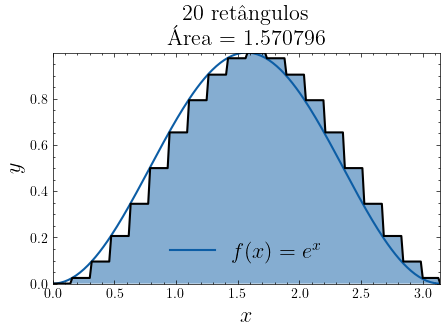

In [17]:
# Definindo a quantidade de pontos no intervalo desejado
x = np.linspace(a,b,200)
y = fun_ex(x) 

N = 20

# Definindo o tamanho da figura
plt.figure(figsize=(5,3))
# plotando o gráfico
plt.plot(x,y,label="$f(x) = e^{x}$",lw=1.5)
plt.ylim(min(y),max(y))
plt.xlim(a,b)

def fun_ex_sq(x,a=0.0,b=3.0,n=1):
    # print(x*n/(b-a))
    x_ = np.floor(x*n/(b-a))*(b-a)/n
    return fun_ex(x_)

def integrate_sq(a=0,b=3,n=1):
    soma = 0.0 
    delta = (b-a)/n
    x0 = a
    f0 = fun_ex(a)
    for i in range(n):
        soma += f0*delta
        x0 += delta
        f0 = fun_ex(x0)
    return '{0:.6f}'.format(soma)

plt.plot(x,fun_ex_sq(x,a,b,N),lw=1.5,color='black')
plt.fill_between(x,fun_ex_sq(x,a,b,N),alpha=0.5)

plt.title(f"{N} retângulos\nÁrea = {integrate_sq(a,b,N)}",fontsize=16)
plt.xlabel("$x$",fontsize=16)
plt.ylabel("$y$",fontsize=16)

plt.legend(fontsize=16)
plt.show()

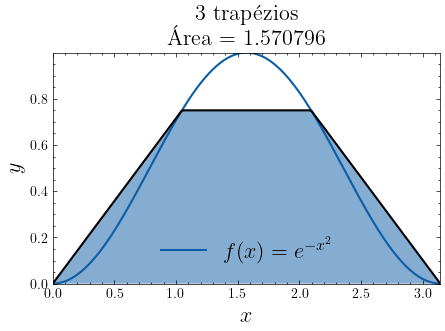

In [16]:
# Definindo a quantidade de pontos no intervalo desejado
x = np.linspace(a,b,200)
y = fun_ex(x) 

N = 3

# Definindo o tamanho da figura
plt.figure(figsize=(5,3))
# plotando o gráfico
plt.plot(x,y,label="$f(x) = e^{-x^2}$",lw=1.5)
plt.ylim(min(y),max(y))
plt.xlim(a,b)

def fun_ex_sq(x,a=0,b=3,n=1):
    x_0 = np.floor(x*n/(b-a))*(b-a)/n
    x_1 = x_0 + (b-a)/n
    return lerp(x,f=fun_ex,a=x_0,b=x_1)

def integrate_trap(a=0,b=3,n=1):
    soma = 0.0 
    delta = (b-a)/n
    x0 = a
    f0 = fun_ex(a)
    for i in range(n):
        soma += (f0+fun_ex(x0+delta))*delta/2
        x0 += delta
        f0 = fun_ex(x0)
    return '{0:.6f}'.format(soma)

plt.plot(x,fun_ex_sq(x,a,b,N),lw=1.5,color='black')
plt.fill_between(x,fun_ex_sq(x,a,b,N),alpha=0.5)

#plt.text(1.5,0.6,f"{N} trapézios",fontsize=16)
#plt.text(1.5,0.5,f"Área = {integrate_trap(n=N)}",fontsize=16)
plt.title(f"{N} trapézios\nÁrea = {integrate_trap(a,b,N)}",fontsize=16)

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$y$",fontsize=16)

plt.legend(fontsize=16)
plt.show()

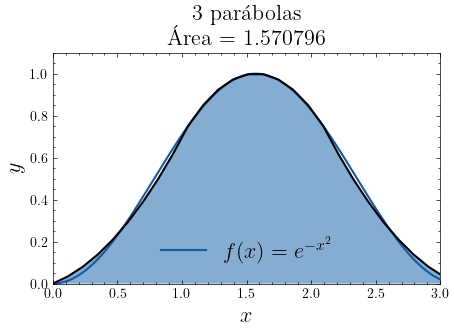

In [15]:
# Definindo a quantidade de pontos no intervalo desejado
x = np.linspace(a,b,200)
y = fun_ex(x) 

N = 3

# Definindo o tamanho da figura
plt.figure(figsize=(5,3))
# plotando o gráfico
plt.plot(x,y,label="$f(x) = e^{-x^2}$",lw=1.5)
plt.ylim(0.0,1.1)
plt.xlim(0.0,3.0)

def fun_ex_sim(a=0.0,b=3.0,n=1):
    x__,y__ = [],[]
    
    delta = (b-a)/n
    x_0 = a 
    x_1 = x_0 + delta
    
    for i in range(n):
        x_ = np.linspace(x_0,x_1,10)
        x__ = np.append(x__,x_)
        y__ = np.append(y__,simp_poly(x_,a=x_0,b=x_1))
        x_0 = x_1 
        x_1 += delta
    return x__,y__

def integrate_simpson(a=0.0,b=3.0,n=1):
    soma = 0.0 
    delta = (b-a)/n
    x0 = a
    f0 = fun_ex(a)
    for i in range(n):
        a_ = x0
        b_ = x0 + delta
        fa = f0 
        fb = fun_ex(b_)
        fab = fun_ex( (a_+b_)/2 )
        soma += (b_-a_)*(fa+4*fab+fb)/6
        x0 += delta
        f0 = fun_ex(x0)
    return '{0:.6f}'.format(soma)
    
x,y = fun_ex_sim(a,b,N)
plt.plot(x,y,lw=1.5,color='black')
plt.fill_between(x,y,alpha=0.5)

plt.title(f"{N} parábolas\nÁrea = {integrate_simpson(a,b,N)}",fontsize=16)

plt.xlabel("$x$",fontsize=16)
plt.ylabel("$y$",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [106]:
# Valor real
val_re = np.sqrt(np.pi)

In [107]:
val_re

1.7724538509055159

In [108]:
# Essa parte tem que ser revista
print(" método   | àrea | val_re")
for i in range(10):
    ret = integrate_sq(n=i+1,a=-3.0,b=3.0)
    trap = integrate_trap(n=i+1,a=-3.0,b=3.0)
    simp = integrate_simpson(n=i+1,a=-3.0,b=3.0)
    print(5*"_*"+f"{i+1} subdivizões"+5*"_*")
    print(f"retângulo  | {ret} | {'{0:.6f}'.format(val_re)}")
    print(f"trapezóide | {trap} | {'{0:.6f}'.format(val_re)}")
    print(f"simpson    | {simp} | {'{0:.6f}'.format(val_re)}")

 método   | àrea | val_re
_*_*_*_*_*1 subdivizões_*_*_*_*_*
retângulo  | 0.119489 | 1.772454
trapezóide | 0.119489 | 1.772454
simpson    | 0.039830 | 1.772454
_*_*_*_*_*2 subdivizões_*_*_*_*_*
retângulo  | 0.059745 | 1.772454
trapezóide | 0.059745 | 1.772454
simpson    | 3.999900 | 1.772454
_*_*_*_*_*3 subdivizões_*_*_*_*_*
retângulo  | 2.872123 | 1.772454
trapezóide | 2.872123 | 1.772454
simpson    | 3.162233 | 1.772454
_*_*_*_*_*4 subdivizões_*_*_*_*_*
retângulo  | 3.014861 | 1.772454
trapezóide | 3.014861 | 1.772454
simpson    | 3.145012 | 1.772454
_*_*_*_*_*5 subdivizões_*_*_*_*_*
retângulo  | 3.065179 | 1.772454
trapezóide | 3.065179 | 1.772454
simpson    | 3.141642 | 1.772454
_*_*_*_*_*6 subdivizões_*_*_*_*_*
retângulo  | 3.089705 | 1.772454
trapezóide | 3.089705 | 1.772454
simpson    | 3.140587 | 1.772454
_*_*_*_*_*7 subdivizões_*_*_*_*_*
retângulo  | 3.103691 | 1.772454
trapezóide | 3.103691 | 1.772454
simpson    | 3.140166 | 1.772454
_*_*_*_*_*8 subdivizões_*_*_*_*_*
retângulo